# 1. 인구 피라미드

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
# 그래프 출력 관련 옵션 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [96]:
df = pd.read_excel('./Data/2022_01_인구현황.xlsx')

# 읽어올 때, 데이터 필터링 하기
df_m = pd.read_excel('./Data/2022_01_인구현황.xlsx',
                     skiprows = 3,
                     index_col = '행정기관',
                     usecols = 'B,E:Y')

C:\Users\Andrew Kei\anaconda3\envs\andrew_kei\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
list(df.iloc[1]).index('여')

25

In [98]:
columns = list(df.iloc[2])
df = df[3:].copy()
df.columns = columns

In [119]:
male_df = df.iloc[:, 4:25]
male_df.index = df['행정기관']

female_df = df.iloc[:, 27:]
female_df.index = df['행정기관']

In [127]:
print(male_df.shape, female_df.shape)

display(male_df.head(3))

(18, 21) (18, 21)


,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
전국,"778,266","1,137,135","1,216,746","1,212,320","1,616,561","1,862,891","1,679,387","1,784,229","2,035,381","2,114,019",...,"2,082,375","2,053,427","1,472,075","992,362","697,893","463,734","198,740","50,759","9,148","1,423"
서울특별시,"124,880","172,822","188,912","198,167","284,873","396,975","368,139","349,617","362,532","370,189",...,"347,181","344,833","264,329","183,033","134,354","84,626","33,627","8,977","1,819",398
부산광역시,"44,691","67,451","68,484","68,547","99,309","114,958","100,632","106,805","126,676","126,648",...,"131,229","144,390","115,206","80,732","54,526","33,380","12,373","2,911",467,67


In [180]:
# apply ??

# male_df = male_df.replace(',', '', regex = True)
# male_df = male_df.astype(int)

female_df = female_df.replace(',', '', regex = True)
female_df = female_df.astype(int)

### 그래프 작성

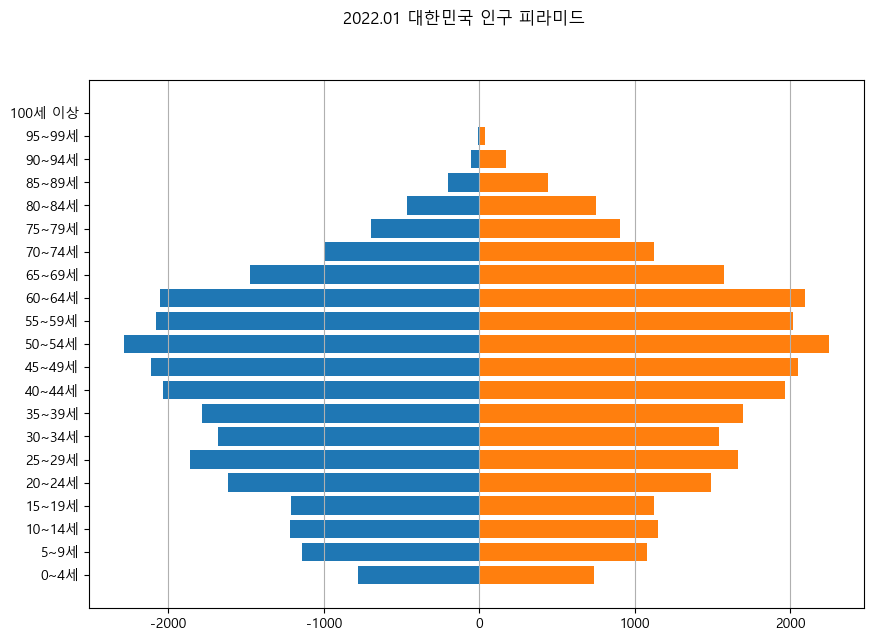

In [197]:
fig, ax = plt.subplots(figsize = (10, 7), dpi = 100)

ax.barh(male_df.columns, -male_df.iloc[0] // 1000) # 단위 천명
ax.barh(female_df.columns, female_df.iloc[0] // 1000)

fig.suptitle('2022.01 대한민국 인구 피라미드')
ax.grid(axis = 'x')

plt.show()

# 2. 출생아 수 및 합계 출산율

In [200]:
df = pd.read_excel('./Data/출생아_통계.xls',
                   skiprows = 2,
                   nrows = 2,
                   index_col = 0)

In [210]:
# df.index = ['출생아 수', '합계 출산율']

# rename을 통한 수정 (몇몇 값만 바꿀 때 사용하면 유용)
df.rename(index = {'출생아\xa0수': '출생아 수',
                   '합계\xa0출산율': '합계 출산율'}, inplace = True)

In [214]:
df = df.T

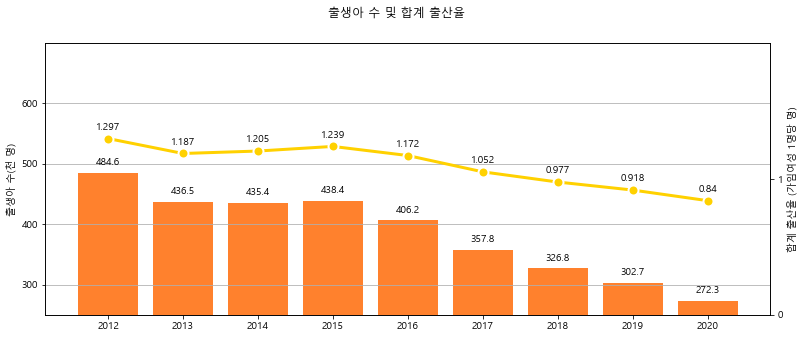

In [255]:
fig, ax = plt.subplots(figsize = (13, 5))

ax.bar(df.index, df['출생아 수'],
       color = '#ff812d')

ax.set_ylabel('출생아 수(천 명)')
ax.set_yticks([300, 400, 500, 600])
ax.set_ylim(250, 700)
ax.grid(axis = 'y')
for idx, val in enumerate(df['출생아 수']):
    ax.text(idx, val + 10, val,
            ha = 'center', va = 'bottom')

ax_ = ax.twinx() # x 축을 공유하는 그래프 축
ax_.plot(df.index, df['합계 출산율'],
         color = '#ffd100',
         marker = 'o',
         markersize = 10,
         markeredgecolor = 'w',
         markeredgewidth = 2,
         linewidth = 3)

ax_.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax_.set_yticks([0, 1])
ax_.set_ylim(0, 2)
for idx, val in enumerate(df['합계 출산율']):
    ax_.text(idx, val + 0.05, val,
             ha = 'center', va = 'bottom')

fig.suptitle('출생아 수 및 합계 출산율')
plt.show()